In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np



In [56]:
img = image.load_img("training/cars/GTR.JPG")

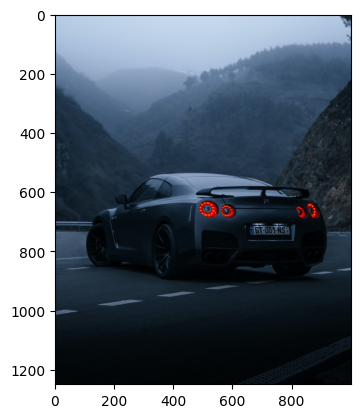

In [57]:
plt.imshow(img)

In [58]:
cv2.imread("training/cars/GTR.JPG").shape

(1250, 1000, 3)

In [59]:
training = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [60]:
training_dataset = training.flow_from_directory("training/",
                                               target_size = (200,200),
                                               batch_size = 3,
                                               class_mode = "binary")

validation_dataset = training.flow_from_directory("validation/",
                                               target_size = (200,200),
                                               batch_size = 3,
                                               class_mode = "binary")

Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [61]:
training_dataset.class_indices

{'cars': 0, 'motorcycles': 1}

In [62]:
training_dataset.classes

array([0, 0, 0, 0, 1, 1, 1, 1])

In [63]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = "relu", input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = "relu"),
                                    ##
                                    tf.keras.layers.Dense(1,activation = "sigmoid"),
                                   ])

In [64]:
model.compile(loss="binary_crossentropy",
    optimizer = RMSprop(learning_rate=0.001),
    metrics = ["accuracy"])

In [69]:
model_fit = model.fit(training_dataset,
                     steps_per_epoch = 2,
                     epochs = 8,
                     validation_data = validation_dataset)

Epoch 1/8
2/2 [==============================] - 1s 477ms/step - loss: 2.5074e-04 - accuracy: 1.0000 - val_loss: 1.8044e-04 - val_accuracy: 1.0000
Epoch 2/8
2/2 [==============================] - 1s 359ms/step - loss: 2.1916e-04 - accuracy: 1.0000 - val_loss: 1.5009e-04 - val_accuracy: 1.0000
Epoch 3/8
2/2 [==============================] - 1s 358ms/step - loss: 1.7783e-04 - accuracy: 1.0000 - val_loss: 1.2389e-04 - val_accuracy: 1.0000
Epoch 4/8
2/2 [==============================] - 1s 349ms/step - loss: 1.3551e-04 - accuracy: 1.0000 - val_loss: 1.0845e-04 - val_accuracy: 1.0000
Epoch 5/8
2/2 [==============================] - 1s 350ms/step - loss: 8.1195e-05 - accuracy: 1.0000 - val_loss: 9.9955e-05 - val_accuracy: 1.0000
Epoch 6/8
2/2 [==============================] - 1s 369ms/step - loss: 6.9729e-05 - accuracy: 1.0000 - val_loss: 8.6158e-05 - val_accuracy: 1.0000
Epoch 7/8
2/2 [==============================] - 1s 359ms/step - loss: 5.7549e-05 - accuracy: 1.0000 - val_loss: 7.977

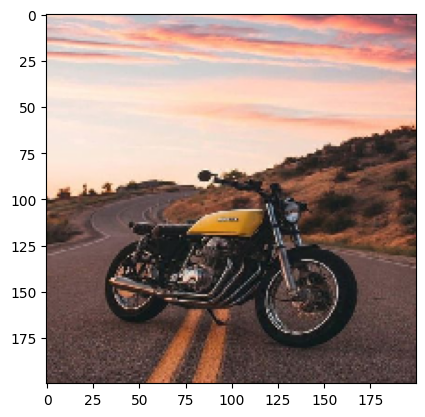

1/1 [==============================] - 0s 52ms/step
motociklia


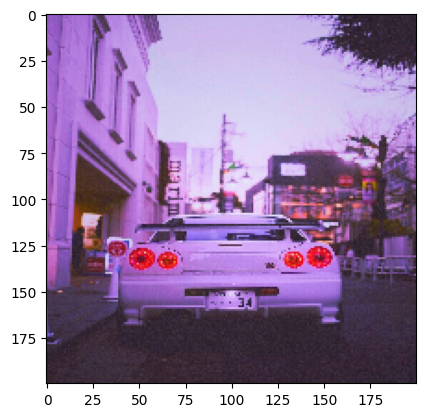

1/1 [==============================] - 0s 26ms/step
manqanaa


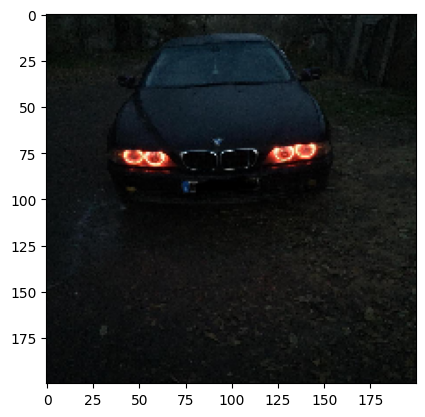

1/1 [==============================] - 0s 23ms/step
manqanaa


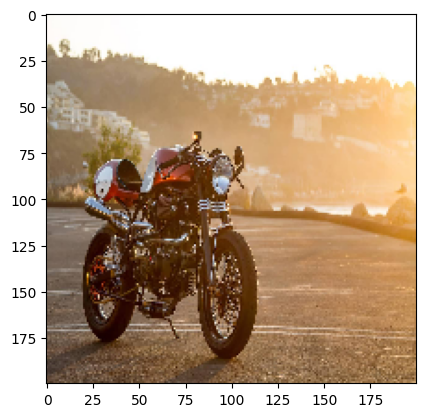

1/1 [==============================] - 0s 26ms/step
motociklia


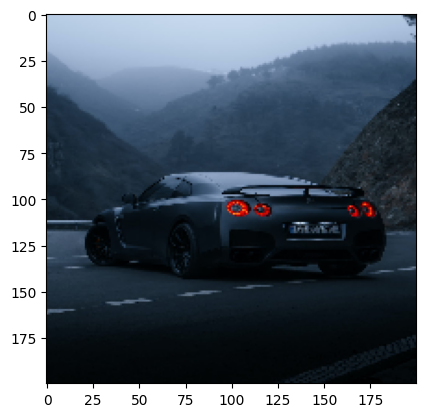

1/1 [==============================] - 0s 24ms/step
manqanaa


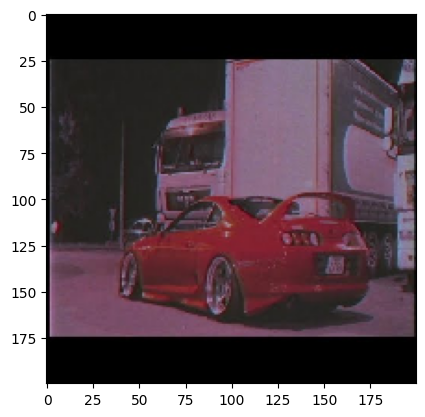

1/1 [==============================] - 0s 23ms/step
manqanaa


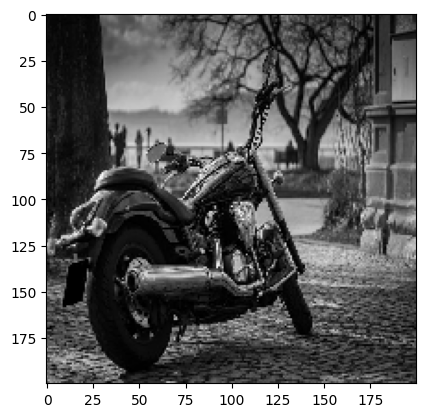

1/1 [==============================] - 0s 24ms/step
motociklia


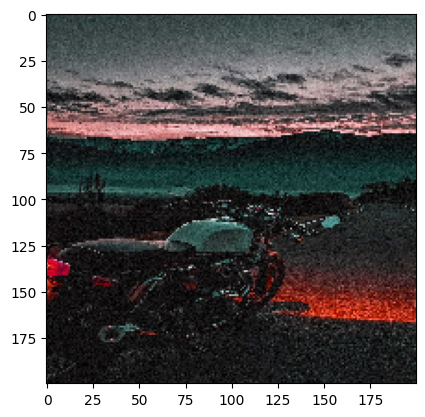

1/1 [==============================] - 0s 24ms/step
motociklia


In [70]:
dir_path = "testing/"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("manqanaa")
    else:
        print("motociklia")